# 미분
* 한 순간(한 순간은 구할 수가 없으니까 매우 작은 변화에서의) 변화량(기울기)를 구하는 것
* 변화량이 0 일때를 순간이라고 할텐데, 변화량이 0일때의 기울기는 구할 수가 없기 때문에
* 변화량 : $\frac{y의변화량}{x의변화량}$

-----
$x$ 한 순간 ($x$에 대해 매우 작은 변화가 일어났을 때)의 변화량

$$\frac{ df(x) }{ dx }  = \lim_{h\to 0} \frac{f(x+h) - f(x)}{ (x+h)-x }=\lim_{h\to 0} \frac{f(x+h) - f(x)}{ h }$$

In [2]:
# 미분의 나쁜 구현
def numerical_diff(f, x):
  '''
    f : 미분 대상 함수
    x : 미분을 수행할 x의 위치 -> x인 순간의 기울기를 구하기 위함
  '''
  h = 1e-50
  return ( f(x+h)-f(x) ) / h

너무나 작은 숫자로 나눗셈을 하게 되면, 컴퓨팅 시스템상 부동소수점 오류가 발생한다. (반올림 오차)
  * 소수점 어느 특정 부터는 계산을 할 수 없음.
  * `0.000000000000000000000000000000000000000000000000001`를 `0.0`으로 인식

In [3]:
import numpy as np

np.float32(1e-45)

1e-45

# 전방차분과 중앙차분을 이용한 미분
$$
\frac{ df(x) }{ dx }  =  \lim_{h\to 0} \frac{f(x+h) - f(x-h)}{ x+h - (x-h) } = \lim_{h\to 0} \frac{f(x+h) - f(x-h)}{ 2h }
$$

In [4]:
# 개선된 수치미분 함수
def numerical_diff(f, x):
  h = 0.0001
  return (f(x+h)- f(x-h)) / (2 * h)

실제 $x$를 집어 넣고 **미분을 계산 하는 것을 수치미분**이라고 한다.

# 수치미분의 예시
$$
f(x) = y = 0.01x^2 + 0.1x
$$

In [5]:
def function_1(x):
  return 0.01 * x**2 + 0.1 * x

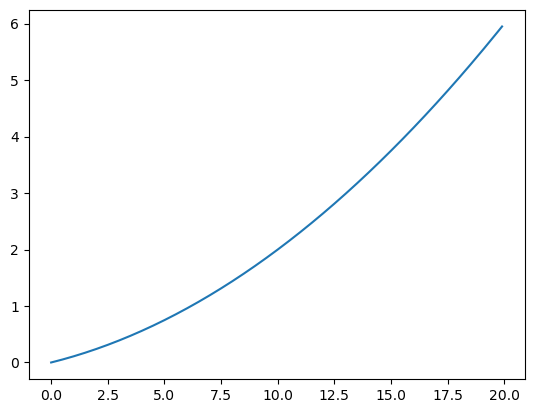

In [6]:
import matplotlib.pyplot as plt

x = np.arange(0, 20, 0.1)
y = function_1(x)

plt.plot(x, y)
plt.show()

In [7]:
# x가 5일 때의 미분값
print("x = 5일때의 미분값 : {:.1f}".format(numerical_diff(function_1, 5)))
print("x = 10일때의 미분값 : {:.1f}".format(numerical_diff(function_1, 10)))

x = 5일때의 미분값 : 0.2
x = 10일때의 미분값 : 0.3


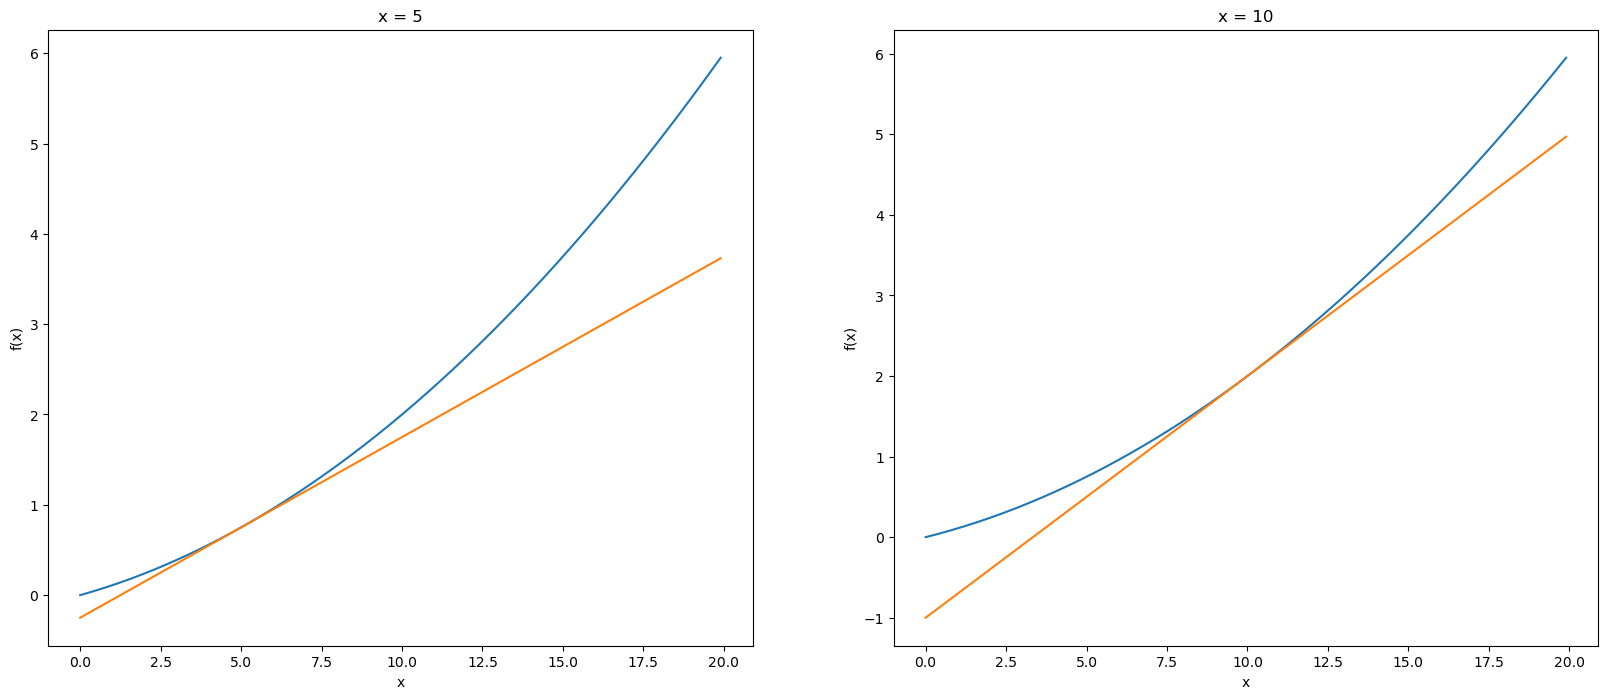

In [8]:
# 미분값을 이용한 접선 시각화
def tangent_line(f, x):
    d = numerical_diff(f, x)
    y = f(x) - d*x
    return lambda t: d*t + y

fig, axes = plt.subplots(1,2, figsize=(20,8))

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
axes[0].set_xlabel("x")
axes[0].set_ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x)

axes[0].plot(x, y)
axes[0].plot(x, y2)
axes[0].set_title("x = 5")

axes[1].set_xlabel("x")
axes[1].set_ylabel("f(x)")

tf = tangent_line(function_1, 10)
y2 = tf(x)

axes[1].plot(x, y)
axes[1].plot(x, y2)
axes[1].set_title("x = 10")
plt.show()

# 편미분
* 위의 예에서는 $x$(인수)가 1개
* 2개 이상의 인수에 대한 미분을 편미분 이라고 한다.
* 한 쪽만 미분 하는 것
  * 여러 개의 인수 중 하나만 미분 하는 것
$$
f(x_0, x_1) = x^2_0 + x^2_1
$$

In [9]:
def function_2(x):
  return x[0]**2 + x[1]**2

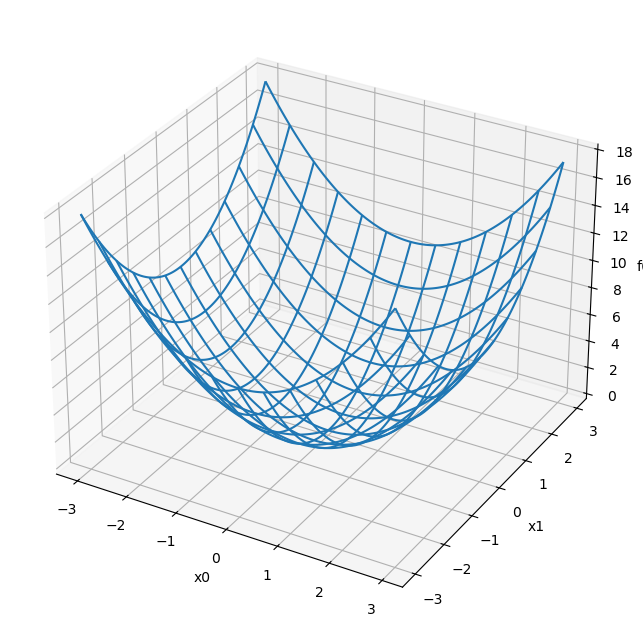

In [10]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

X0 = np.arange(-3, 3, 0.05)
X1 = np.arange(-3, 3, 0.05)

X0, X1 = np.meshgrid(X0, X1)
Z = function_2([X0,X1])

ax.plot_wireframe(X=X0, Y=X1, Z=Z,rstride=10, cstride=10)
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_zlabel('f(x)')
plt.show()

## 문제 1
$x_0=3, x_1=4$ 일 때 $x_0$에 대한 편미분 $\frac{\partial f}{\partial x_0}$를 구하시오.

In [11]:
def function_tmp1(x0):
  x1 = 4.0
  return x0 ** 2 + x1 ** 2

In [12]:
numerical_diff(function_tmp1, 3)

6.00000000000378

## 문제 2
$x_0=3, x_1=4$ 일 때 $x_1$에 대한 편미분 $\frac{\partial f}{\partial x_1}$를 구하시오. `답 : 약 8.0`

In [13]:
def function_tmp2(x1):
  return 3.0 ** 2 + x1 ** 2

print("{:.1f}".format(numerical_diff(function_tmp2, 4.0)))

8.0


# 기울기( gradient )
* $x_0$에 대한 기울기와, $x_1$의 기울기를 따로 따로 구해서 확인
  * $x_0=3, x_1=4$ 일때의 미분을 각각 구함
  * $\frac{\partial f}{\partial x_0}$, $\frac{\partial f}{\partial x_1}$ 각각 구해봄
* 각 방향의( $x_0$, $x_1$ ) 기울기를 하나로 묶어서 벡터화 시킨다.
  * 즉 우리는 $(\frac{\partial f}{\partial x_0},\frac{\partial f}{\partial x_1})$를 구할 것이다.
  * 방향을 알 수 있게 된다.

In [14]:
# 이 함수는 의미 파악만 할 것!
def numerical_gradient(f, x):
  h = 1e-4 # 0.0001
  grad = np.zeros_like(x) # x와 shape이 같은 0으로 채워진 배열을 생성하기

  for idx in range(x.size):
      # 각 x에 대한 편미분을 수행한다.

      tmp_val = x[idx]

      # f(x+h) 계산
      x[idx] = float(tmp_val) + h # 목표로 하고 있는 x의 변화량을 구하기 위함
      fxh1 = f(x) # 변화량을 준(tmp_val+h) x에대한 전방차분을 구한다.

      # f(x-h) 계산
      x[idx] = tmp_val - h
      fxh2 = f(x)

      grad[idx] = (fxh1 - fxh2) / (2*h) # 미분 수행
      x[idx] = tmp_val # 원래 값으로 복원 하기

  return grad

In [15]:
x = np.array([3.0, 4.0])

numerical_gradient(function_2, x)

array([6., 8.])

In [16]:
x = np.array([3.0, 4.0])
print("x = [3, 4] 일 때의 기울기 배열 : {}".format(numerical_gradient(function_2, x)))

x = np.array([1.0, 2.0])
print("x = [1, 2] 일 때의 기울기 배열 : {}".format(numerical_gradient(function_2, x)))

x = np.array([1.0, 1.0])
print("x = [1, 1] 일 때의 기울기 배열 : {}".format(numerical_gradient(function_2, x)))

x = np.array([0.3, 0.3])
print("x = [0.3, 0.3] 일 때의 기울기 배열 : {}".format(numerical_gradient(function_2, x)))

x = np.array([0.01, 0.01])
print("x = [0.01, 0.01] 일 때의 기울기 배열 : {}".format(numerical_gradient(function_2, x)))

x = [3, 4] 일 때의 기울기 배열 : [6. 8.]
x = [1, 2] 일 때의 기울기 배열 : [2. 4.]
x = [1, 1] 일 때의 기울기 배열 : [2. 2.]
x = [0.3, 0.3] 일 때의 기울기 배열 : [0.6 0.6]
x = [0.01, 0.01] 일 때의 기울기 배열 : [0.02 0.02]


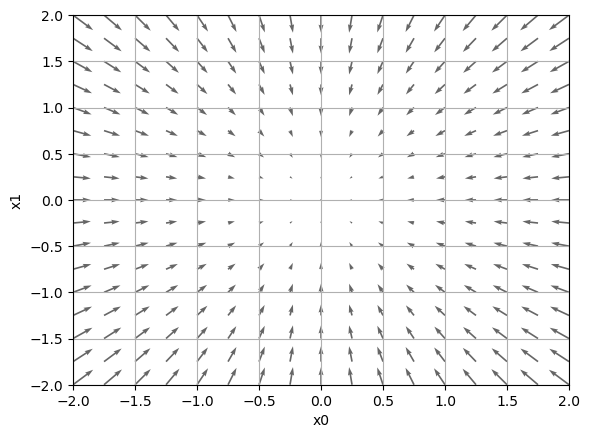

In [17]:
# coding: utf-8
# cf.http://d.hatena.ne.jp/white_wheels/20100327/p3
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성

    for idx in range(x.size):
        tmp_val = x[idx]

        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)

        # f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원

    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)

        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)

        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y

if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)

    X = X.flatten()
    Y = Y.flatten()

    grad = numerical_gradient(function_2, np.array([X, Y]) )

    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.draw()
    plt.show()

* $\left ( \frac{\partial f}{\partial x_0}, \frac{\partial f}{\partial x_1} \right )$을 벡터로 묶어서 표현
  * 최소지점으로 가기 위한 $x_0$의 방향과 크기, 최소지점으로 가기 위한 $x_1$의 방향과 크기
* 기울기가 크면 클 수록 그 만큼 많이 움직여야 한다.
* 기울기가 기리키는 쪽은 각 장소에서(좌표에서) 함수의 출력값 $x_0^2+x_1^2$의 결괏값이 가장 작은 곳

# ⭐️⭐️⭐️ 경사하강법(경사법), Gradient Descent ⭐️⭐️⭐️
* 기울기를 줄여 나가는 방법
* 최초 지점에서 시작해서 일정 거리만큼 이동하면서 기울기를 **수정(갱신)**
  * 어디로 이동해요? 함수의 값이 최소지점이 되는 방향으로 일정 거리만큼 움직인다.

# 경사하강법의 원리
* 현 위치에서 기울어진 방향으로 일정 거리만큼 이동
  * 갱신 되는 위치(좌표)가 일정한게 아니고, 미분 값을 보고 갱신해야 할 수치를 일정하게 **조정**
  * 학습률 ( **learning rate $\eta$** )이라고 한다.
* 이동한 곳에서도 미분을 통해 기울기를 구하고, 기울기를 구한 방향으로 이동
* 이 과정을 최솟점을 찾는 지점까지 반복(step)

**경사하강법의 수식**
$$
x_0 = x_0 - \eta \frac{\partial f}{\partial x_0}
$$

$$
x_1 = x_1 - \eta \frac{\partial f}{\partial x_1}
$$

* $\eta$ : Learning Rate ( 하이퍼 파라미터 )

In [18]:
def gradient_descent(f, start_x, lr=0.01, step_num=100):
  '''
    f : 경사하강법을 수행할 함수(미분 대상 함수)
    start_x : x의 최초 지점
    lr : learning_rate
    step_num : 경사하강법 수행 횟수
  '''

  x = start_x

  for i in range(step_num):
    # 1. Gradient Vector 얻기
    grads = numerical_gradient(f, x)
    print("좌표 : {} / 기울기 : {}".format(x, grads))

    # 2. 경사하강법 공식을 이용한 좌표 갱신
    x = x - lr * grads

  # 최종 좌표를 리턴
  return x

In [19]:
start_x = np.array([-3.0, 4.0])
gradient_descent(function_2, start_x, lr=0.1)

좌표 : [-3.  4.] / 기울기 : [-6.  8.]
좌표 : [-2.4  3.2] / 기울기 : [-4.8  6.4]
좌표 : [-1.92  2.56] / 기울기 : [-3.84  5.12]
좌표 : [-1.536  2.048] / 기울기 : [-3.072  4.096]
좌표 : [-1.2288  1.6384] / 기울기 : [-2.4576  3.2768]
좌표 : [-0.98304  1.31072] / 기울기 : [-1.96608  2.62144]
좌표 : [-0.786432  1.048576] / 기울기 : [-1.572864  2.097152]
좌표 : [-0.6291456  0.8388608] / 기울기 : [-1.2582912  1.6777216]
좌표 : [-0.50331648  0.67108864] / 기울기 : [-1.00663296  1.34217728]
좌표 : [-0.40265318  0.53687091] / 기울기 : [-0.80530637  1.07374182]
좌표 : [-0.32212255  0.42949673] / 기울기 : [-0.64424509  0.85899346]
좌표 : [-0.25769804  0.34359738] / 기울기 : [-0.51539608  0.68719477]
좌표 : [-0.20615843  0.27487791] / 기울기 : [-0.41231686  0.54975581]
좌표 : [-0.16492674  0.21990233] / 기울기 : [-0.32985349  0.43980465]
좌표 : [-0.1319414   0.17592186] / 기울기 : [-0.26388279  0.35184372]
좌표 : [-0.10555312  0.14073749] / 기울기 : [-0.21110623  0.28147498]
좌표 : [-0.08444249  0.11258999] / 기울기 : [-0.16888499  0.22517998]
좌표 : [-0.06755399  0.09007199] / 기울기 : 

array([-6.11110793e-10,  8.14814391e-10])

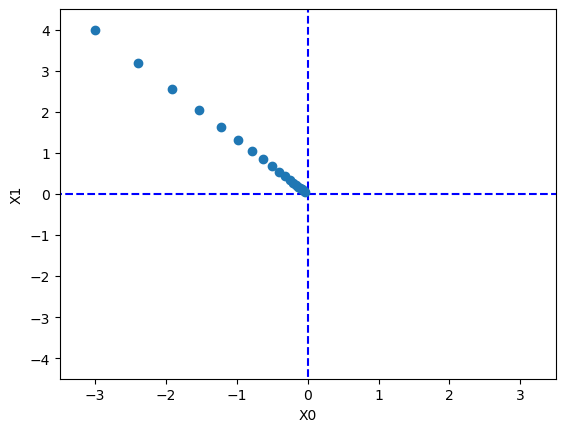

In [20]:
import numpy as np
import matplotlib.pylab as plt


def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)

init_x = np.array([-3.0, 4.0])

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

**학습률(Learning Rate)이 너무 크거나 작으면??**

In [21]:
# 학습률이 너무 클 때. lr=10.0
start_x = np.array([-3.0, 4.0])
result, _ = gradient_descent(function_2, start_x, lr=10.0)
print("Learning Rate 10.0 : {}".format(result))

Learning Rate 10.0 : [-2.58983747e+13 -1.29524862e+12]


In [22]:
# 학습률이 너무 작은 예
start_x = np.array([-3.0, 4.0])
result, _ = gradient_descent(function_2, start_x, lr=1e-10)
print("Learning Rate 1e-10 : {}".format(result))

Learning Rate 1e-10 : [-2.99999994  3.99999992]


# SimpleNet 만들기
* 입력을 두개 받는 `[x1, x_2]` 3개의 뉴런을 가진 신경망
* 편향 고려 x, 가중치만 사용

In [23]:
# 실습에 필요한 함수들
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T

    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)

    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)

    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)

        x[idx] = tmp_val - h
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)

        x[idx] = tmp_val # 값 복원
        it.iternext()

    return grad

In [24]:
class SimpleNet:

  # 신경망의 생성자에서는 신경망에서 초기에 가지고 있어야 할 매개변수(나중에는 레이어)를 세팅
  def __init__(self):
    np.random.seed(42)
    self.W = np.random.randn(2, 3)

  # predict : 순전파. Forward Propagation
  def predict(self, x):
    y_pred = x @ self.W
    return y_pred

  # loss함수(CEE)를 이용해서 손실 값을 얻어낼 함수.
  def loss(self, x, t):
    # 손실 함수를 이용해서 손실을 구하기 위해 필요한 것
    #   손실 함수, 예측 값 (y_pred), 정답(target)

    # 예측값 얻어내기
    z = self.predict(x)
    y_pred = softmax(z)

    loss = cross_entropy_error(y_pred, t)
    return loss

In [25]:
model = SimpleNet()
model.W

array([[ 0.49671415, -0.1382643 ,  0.64768854],
       [ 1.52302986, -0.23415337, -0.23413696]])

In [26]:
x = np.array([0.6, 0.8])
prediction = model.predict(x)
prediction

array([ 1.51645238, -0.27028128,  0.20130356])

In [27]:
t_true = np.array([1, 0, 0])
t_error = np.array([0, 0, 1])

In [28]:
# 정답을 잘 예측 했을 때의 Loss
model.loss(x, t_true)

0.36182008827107054

In [29]:
# 정답을 예측 못 했을때의 Loss
model.loss(x, t_error)

1.6769685165655834

$$
\frac{\partial L}{\partial W}=\begin{pmatrix} \frac{\partial L}{\partial w_{11}} & \frac{\partial L}{\partial w_{21}} & \frac{\partial L}{\partial w_{31}} \\ \frac{\partial L}{\partial w_{12}}&\frac{\partial L}{\partial w_{22}}&\frac{\partial L}{\partial w_{32}} \\\end{pmatrix}
$$

In [30]:
# 가중치를 받아서 손실을 구하는 함수
def f(W):
  return model.loss(x, t_true)

dW = numerical_gradient(f, model.W)

In [31]:
dW

array([[-0.18215544,  0.06999163,  0.11216382],
       [-0.24287393,  0.09332217,  0.14955176]])

In [32]:
# 실습에 필요한 함수들
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T

    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)

    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)

    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)

        x[idx] = tmp_val - h
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)

        x[idx] = tmp_val # 값 복원
        it.iternext()

    return grad